# Setup

In [1]:
from google.colab import drive
from IPython.display import clear_output
import ipywidgets as widgets
import os

def inf(msg, style, wdth):
  inf = widgets.Button(description=msg, disabled=True, button_style=style, layout=widgets.Layout(min_width=wdth))
  display(inf)

!git clone https://github.com/evileye2002/ImageSearch.git

clear_output()
inf('\u2714 Done','success', '50px')


Button(button_style='success', description='✔ Done', disabled=True, layout=Layout(min_width='50px'), style=But…

# Connect to Drive

---

In [1]:
print("[0;33mConnecting...")
drive.mount('/content/gdrive')

# %mkdir -p /content/gdrive/MyDrive/ImageSearch
# %cd /content/gdrive/MyDrive/ImageSearch

clear_output()
inf('\u2714 Done','success', '50px')

Button(button_style='success', description='✔ Done', disabled=True, layout=Layout(min_width='50px'), style=But…

# Install

In [2]:
!pip install -r requirements.txt

clear_output()
inf('\u2714 Done','success', '50px')

Button(button_style='success', description='✔ Done', disabled=True, layout=Layout(min_width='50px'), style=But…

# Store Vectors

In [ ]:
import os

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import  Model

from PIL import Image
import pickle
import numpy as np

# Ham tao model
def get_extract_model():
    vgg16_model = VGG16(weights="imagenet")
    extract_model = Model(inputs=vgg16_model.inputs, outputs = vgg16_model.get_layer("fc1").output)
    return extract_model

# Ham tien xu ly, chuyen doi hinh anh thanh tensor
def image_preprocess(img):
    img = img.resize((224,224))
    img = img.convert("RGB")
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

def extract_vector(model, image_path):
    print("Xu ly : ", image_path)
    img = Image.open(image_path)
    img_tensor = image_preprocess(img)

    # Trich dac trung
    vector = model.predict(img_tensor)[0]
    # Chuan hoa vector = chia chia L2 norm (tu google search)
    vector = vector / np.linalg.norm(vector)
    return vector

data_folder = "Dataset" #@param {type:"string"}
%cd /content/gdrive/MyDrive/ImageSearch

# Khoi tao model
model = get_extract_model()

vectors = []
paths = []

for image_path in os.listdir( data_folder):
    # Noi full path
    image_path_full = os.path.join(data_folder, image_path)
    # Trich dac trung
    image_vector = extract_vector(model,image_path_full)
    # Add dac trung va full path vao list
    vectors.append(image_vector)
    paths.append(image_path_full)

# save vao file
vector_file = "vectors.pkl" #@param {type:"string"}
path_file = "paths.pkl" #@param {type:"string"}

pickle.dump(vectors, open(vector_file, "wb"))
pickle.dump(paths, open(path_file, "wb"))

clear_output()
inf('\u2714 Done','success', '50px')


Button(button_style='success', description='✔ Done', disabled=True, layout=Layout(min_width='50px'), style=But…

# Search Image

Xu ly :  TestImage/test_2.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


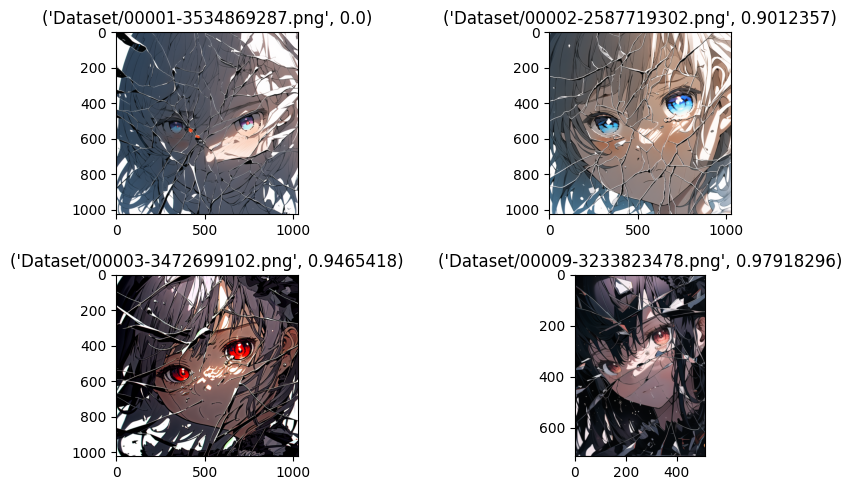

In [ ]:
import math
# Dinh nghia anh can tim kiem
TestImageFolder = "TestImage/"
testImage = "test_2.png" #@param {type:"string"}
search_image = TestImageFolder + testImage

# Khoi tao model
model = get_extract_model()

# Trich dac trung anh search
search_vector = extract_vector(model, search_image)

# Load 4700 vector tu vectors.pkl ra bien
vectorInput = "vectors.pkl" #@param {type:"string"}
pathInput = "paths.pkl" #@param {type:"string"}


vectors = pickle.load(open(vectorInput,"rb"))
paths = pickle.load(open(pathInput,"rb"))

# Tinh khoang cach tu search_vector den tat ca cac vector
distance = np.linalg.norm(vectors - search_vector, axis=1)

# Sap xep va lay ra K vector co khoang cach ngan nhat
K = 4 # @param {type:"integer"}
ids = np.argsort(distance)[:K]

# Tao oputput
nearest_image = [(paths[id], distance[id]) for id in ids]

# Ve len man hinh cac anh gan nhat do
import matplotlib.pyplot as plt

axes = []
grid_size = int(math.sqrt(K))
fig = plt.figure(figsize=(10,5))


for id in range(K):
    draw_image = nearest_image[id]
    axes.append(fig.add_subplot(grid_size, grid_size, id+1))

    axes[-1].set_title(nearest_image[id])
    plt.imshow(Image.open(draw_image[0]))

fig.tight_layout()
plt.show()

# Test

In [ ]:
%cd ImageSearch/
from ImageSearch.main import test

test()